This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.6081 - accuracy: 0.8120 - val_loss: 0.4010 - val_accuracy: 0.8680
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2433 - accuracy: 0.9250 - val_loss: 0.2432 - val_accuracy: 0.9233
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1589 - accuracy: 0.9509 - val_loss: 0.2175 - val_accuracy: 0.9352
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1140 - accuracy: 0.9646 - val_loss: 0.1357 - val_accuracy: 0.9613
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0845 - accuracy: 0.9735 - val_loss: 0.1359 - val_accuracy: 0.9612
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0636 - accuracy: 0.9793 - val_loss: 0.1258 - val_accuracy: 0.9647
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0468 - accuracy: 0.9846 - val_loss: 0.1218 - val_accuracy: 0.9678
Epoch 

**Plotting a validation accuracy comparison**

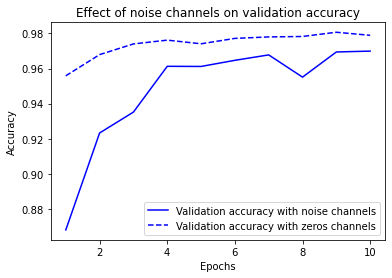

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3174 - accuracy: 0.1043 - val_loss: 2.3063 - val_accuracy: 0.1030
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.3005 - accuracy: 0.1158 - val_loss: 2.3147 - val_accuracy: 0.0984
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2899 - accuracy: 0.1279 - val_loss: 2.3215 - val_accuracy: 0.1023
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2758 - accuracy: 0.1418 - val_loss: 2.3344 - val_accuracy: 0.0988
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2581 - accuracy: 0.1570 - val_loss: 2.3429 - val_accuracy: 0.0958
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2367 - accuracy: 0.1689 - val_loss: 2.3565 - val_accuracy: 0.1022
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2107 - accuracy: 0.1855 - val_loss: 2.3710 - val_accuracy: 0.0967

Epoch 58/100
375/375 [==============================] - 1s 4ms/step - loss: 0.9179 - accuracy: 0.6948 - val_loss: 4.7267 - val_accuracy: 0.0977
Epoch 59/100
375/375 [==============================] - 1s 4ms/step - loss: 0.9025 - accuracy: 0.6995 - val_loss: 4.7702 - val_accuracy: 0.0972
Epoch 60/100
375/375 [==============================] - 1s 4ms/step - loss: 0.8887 - accuracy: 0.7053 - val_loss: 4.8700 - val_accuracy: 0.0964
Epoch 61/100
375/375 [==============================] - 1s 4ms/step - loss: 0.8757 - accuracy: 0.7088 - val_loss: 4.8773 - val_accuracy: 0.0978
Epoch 62/100
375/375 [==============================] - 1s 4ms/step - loss: 0.8608 - accuracy: 0.7165 - val_loss: 4.9650 - val_accuracy: 0.0952
Epoch 63/100
375/375 [==============================] - 1s 4ms/step - loss: 0.8460 - accuracy: 0.7191 - val_loss: 5.0422 - val_accuracy: 0.0970
Epoch 64/100
375/375 [==============================] - 1s 4ms/step - loss: 0.8320 - accuracy: 0.7259 - val_loss: 5.1047 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1025.5645 - accuracy: 0.3944 - val_loss: 2.1251 - val_accuracy: 0.2286
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 4.8081 - accuracy: 0.2697 - val_loss: 2.5011 - val_accuracy: 0.2629
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 3.6155 - accuracy: 0.2837 - val_loss: 1.9929 - val_accuracy: 0.3161
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 3.1149 - accuracy: 0.2693 - val_loss: 2.2086 - val_accuracy: 0.2468
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6198 - accuracy: 0.2700 - val_loss: 2.0240 - val_accuracy: 0.2921
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.6134 - accuracy: 0.3033 - val_loss: 3.0692 - val_accuracy: 0.3143
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5199 - accuracy: 0.2944 - val_loss: 2.1608 - val_accuracy: 0.3264
Epo

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3803 - accuracy: 0.9106 - val_loss: 0.1821 - val_accuracy: 0.9529
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1438 - accuracy: 0.9626 - val_loss: 0.1561 - val_accuracy: 0.9651
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1171 - accuracy: 0.9729 - val_loss: 0.1736 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0995 - accuracy: 0.9774 - val_loss: 0.2183 - val_accuracy: 0.9670
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0979 - accuracy: 0.9802 - val_loss: 0.2113 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0854 - accuracy: 0.9838 - val_loss: 0.2290 - val_accuracy: 0.9707
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0706 - accuracy: 0.9867 - val_loss: 0.2757 - val_accuracy: 0.9732
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 961us/step - loss: 0.6673 - accuracy: 0.8369 - val_loss: 0.3591 - val_accuracy: 0.9031
Epoch 2/20
375/375 [==============================] - 0s 730us/step - loss: 0.3506 - accuracy: 0.9037 - val_loss: 0.3073 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 0s 680us/step - loss: 0.3152 - accuracy: 0.9119 - val_loss: 0.2907 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 0s 698us/step - loss: 0.2993 - accuracy: 0.9161 - val_loss: 0.2803 - val_accuracy: 0.9220
Epoch 5/20
375/375 [==============================] - 0s 680us/step - loss: 0.2895 - accuracy: 0.9191 - val_loss: 0.2770 - val_accuracy: 0.9215
Epoch 6/20
375/375 [==============================] - 0s 682us/step - loss: 0.2829 - accuracy: 0.9206 - val_loss: 0.2741 - val_accuracy: 0.9233
Epoch 7/20
375/375 [==============================] - 0s 672us/step - loss: 0.2781 - accuracy: 0.9222 - val_loss: 0.2694 - val_accuracy:

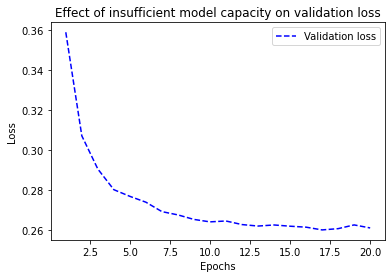

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3603 - accuracy: 0.8962 - val_loss: 0.1778 - val_accuracy: 0.9498
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.9528 - val_loss: 0.1354 - val_accuracy: 0.9593
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9673 - val_loss: 0.1153 - val_accuracy: 0.9665
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9738 - val_loss: 0.1015 - val_accuracy: 0.9707
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9791 - val_loss: 0.0980 - val_accuracy: 0.9718
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0941 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0922 - val_accuracy: 0.9734
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5229 - accuracy: 0.7689 - val_loss: 0.3902 - val_accuracy: 0.8685
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3072 - accuracy: 0.9006 - val_loss: 0.3035 - val_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2225 - accuracy: 0.9269 - val_loss: 0.2767 - val_accuracy: 0.8922
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1764 - accuracy: 0.9421 - val_loss: 0.2833 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1478 - accuracy: 0.9523 - val_loss: 0.2791 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1193 - accuracy: 0.9621 - val_loss: 0.2905 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1009 - accuracy: 0.9697 - val_loss: 0.3218 - val_accuracy: 0.8813
Epoch 8/20
30/30 [

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 14ms/step - loss: 0.6113 - accuracy: 0.6013 - val_loss: 0.5579 - val_accuracy: 0.7004
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.5200 - accuracy: 0.7889 - val_loss: 0.5139 - val_accuracy: 0.7872
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4719 - accuracy: 0.8578 - val_loss: 0.4993 - val_accuracy: 0.7889
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4372 - accuracy: 0.8940 - val_loss: 0.4729 - val_accuracy: 0.8394
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.4075 - accuracy: 0.9179 - val_loss: 0.4589 - val_accuracy: 0.8530
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3784 - accuracy: 0.9371 - val_loss: 0.4320 - val_accuracy: 0.8764
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3387 - accuracy: 0.9533 - val_loss: 0.4127 - val_accuracy: 0.8661
Epoch 8/20
30/30 [

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5445 - accuracy: 0.7473 - val_loss: 0.2976 - val_accuracy: 0.8856
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2604 - accuracy: 0.8945 - val_loss: 0.2848 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1480 - accuracy: 0.9450 - val_loss: 0.2844 - val_accuracy: 0.8936
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0744 - accuracy: 0.9739 - val_loss: 0.3316 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1011 - accuracy: 0.9782 - val_loss: 0.3291 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0064 - accuracy: 0.9996 - val_loss: 0.4952 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 8.7057e-04 - accuracy: 0.9999 - val_loss: 0.5850 - val_accuracy: 0.8887
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 15ms/step - loss: 0.5850 - accuracy: 0.8007 - val_loss: 0.4693 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3996 - accuracy: 0.8961 - val_loss: 0.4025 - val_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3346 - accuracy: 0.9147 - val_loss: 0.3629 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3016 - accuracy: 0.9227 - val_loss: 0.3696 - val_accuracy: 0.8816
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2809 - accuracy: 0.9292 - val_loss: 0.3521 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2639 - accuracy: 0.9344 - val_loss: 0.3526 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2494 - accuracy: 0.9408 - val_loss: 0.3582 - val_accuracy: 0.8838
Epoch 8/20
30/30 [=

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6432 - accuracy: 0.6165 - val_loss: 0.5380 - val_accuracy: 0.8469
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.5332 - accuracy: 0.7515 - val_loss: 0.4350 - val_accuracy: 0.8600
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4508 - accuracy: 0.8064 - val_loss: 0.3514 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3861 - accuracy: 0.8501 - val_loss: 0.3133 - val_accuracy: 0.8806
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3309 - accuracy: 0.8781 - val_loss: 0.2894 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2896 - accuracy: 0.8978 - val_loss: 0.2773 - val_accuracy: 0.8929
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2534 - accuracy: 0.9162 - val_loss: 0.2741 - val_accuracy: 0.8936
Epoch 8/20
30/30 

## Summary